In [1]:
# Aditya Bhalerao
# BE-A   09

# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

# Loading Dataset

In [3]:
df = pd.read_csv('../data/uber.csv')

In [4]:
df.shape

(200000, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [6]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [7]:
df.dtypes

Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [8]:
df.head(3)

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1


In [9]:
df.tail(3)

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1
199999,11951496,2010-05-15 04:08:00.00000076,14.1,2010-05-15 04:08:00 UTC,-73.984395,40.720077,-73.985508,40.768793,1


# Pre-processing

### Removing Unecessary Columns

In [10]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [11]:
df = df.drop(['Unnamed: 0', 'key'], axis=1)

In [12]:
df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

### Numerical Columns

In [13]:
numerical = [x for x in df.columns if df[x].dtype != 'object'] # storing all numerical columns
numerical

['fare_amount',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'passenger_count']

### Categorical Columns

In [14]:
categorical = [x for x in df.columns if df[x].dtype == 'object'] # storing all categorical columns
categorical

['pickup_datetime']

### Removing Null Values

In [15]:
df.isna().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [16]:
df.dropna(axis=0,inplace=True)

In [17]:
df.isna().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

### Fixing data type of pickup_datetime from Object to DateTime

In [18]:
df['pickup_datetime'].dtype

dtype('O')

In [19]:
df.pickup_datetime = pd.to_datetime(df.pickup_datetime, errors='coerce')

In [20]:
df['pickup_datetime'].dtype

datetime64[ns, UTC]

### Adding New Column - Distance

In [21]:
df.shape

(199999, 7)

In [22]:
incorrect_coordinates = df.loc[
(df.pickup_latitude > 90) |(df.pickup_latitude < -90) |
(df.dropoff_latitude > 90) |(df.dropoff_latitude < -90) |
(df.pickup_longitude > 180) |(df.pickup_longitude < -180) |
(df.dropoff_longitude > 180) |(df.dropoff_longitude < -180)
]
df.drop(incorrect_coordinates, inplace = True, errors = 'ignore') # removing incorrect coordinates

In [23]:
df.shape

(199999, 7)

In [24]:
def distance_transform(longitude1, latitude1, longitude2, latitude2):
    long1, lati1, long2, lati2 = map(np.radians, [longitude1, latitude1, longitude2, latitude2])
    dist_long = long2 - long1
    dist_lati = lati2 - lati1
    a = np.sin(dist_lati/2)**2 + np.cos(lati1) * np.cos(lati2) * np.sin(dist_long/2)**2
    c = 2 * np.arcsin(np.sqrt(a)) * 6371

    return c # Haversine Distance

Here, the differences in longitude (dist_long) and latitude (dist_lati) between the two points are calculated in radians.

**a = np.sin(dist_lati/2)**2 + np.cos(lati1) * np.cos(lati2) * np.sin(dist_long/2)**2**

This line implements the Haversine formula, which calculates the haversine of the central angle between two points on the surface of a sphere (in this case, the Earth). The a variable represents this haversine value.

**c = 2 * np.arcsin(np.sqrt(a)) * 6371**

Here, the central angle (c) between the two points is calculated using the haversine value (a). The result is then multiplied by the radius of the Earth in kilometers (approximately 6371 km) to obtain the distance in kilometers.

In [25]:
df['distance'] = distance_transform(
    df['pickup_longitude'],
    df['pickup_latitude'],
    df['dropoff_longitude'],
    df['dropoff_latitude']
    )

In [26]:
df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'distance'],
      dtype='object')

# Outlier Detection and Removal

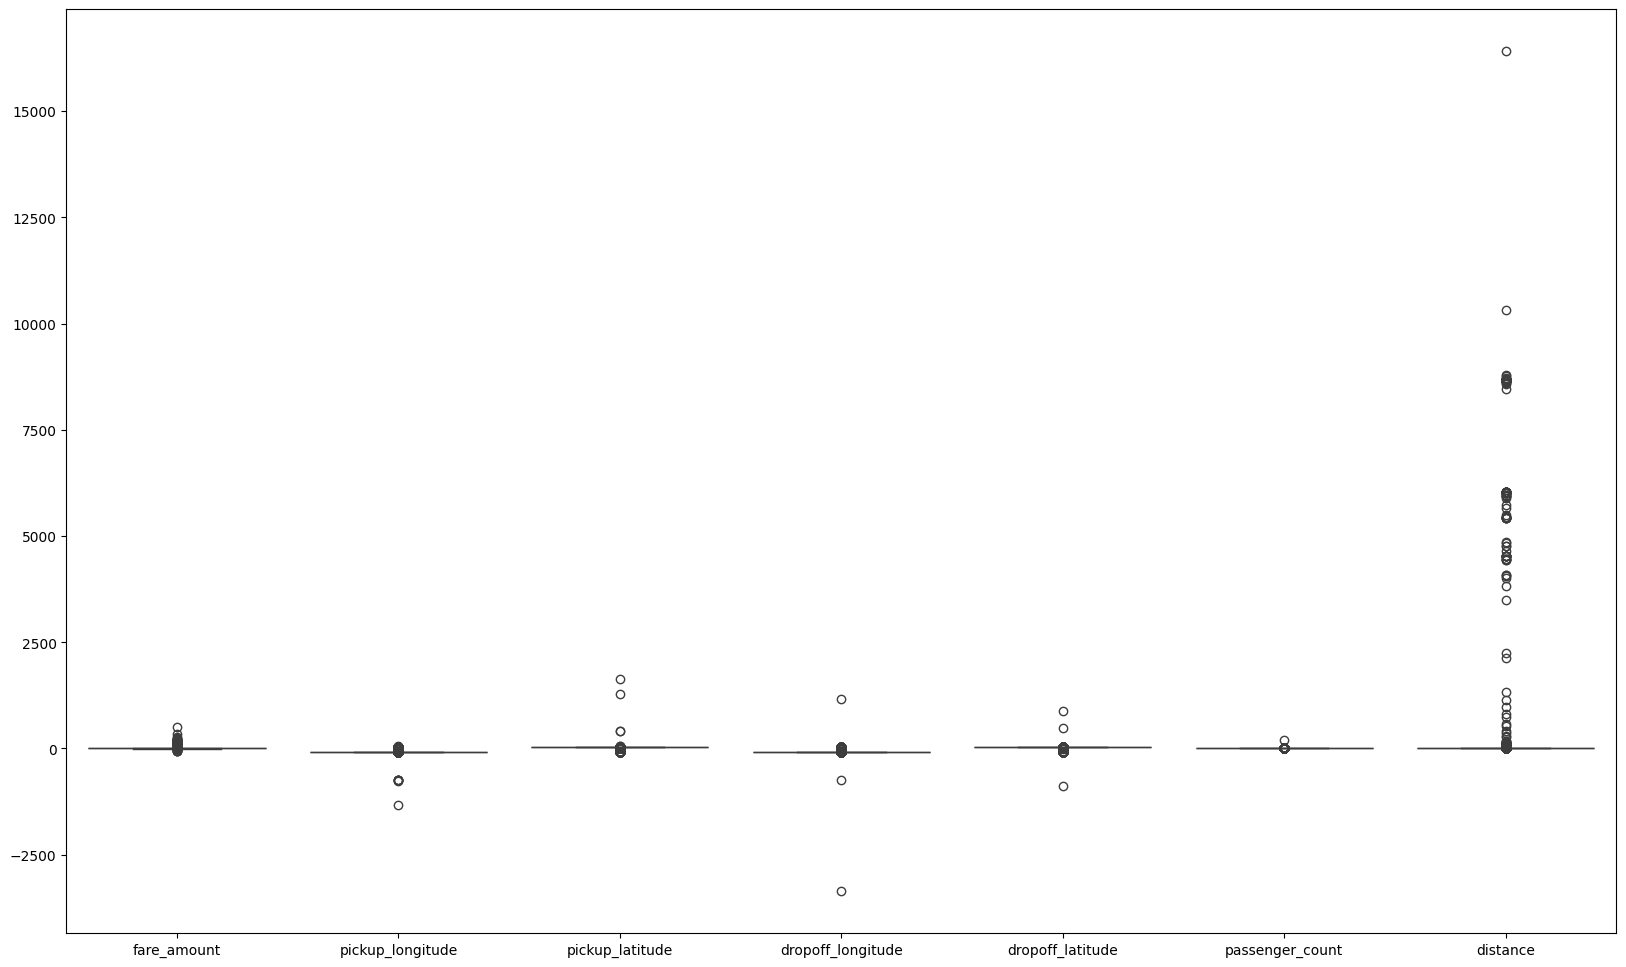

In [27]:
plt.figure(figsize=(20,12))
sns.boxplot(data = df)
plt.show()

Observation - distance column has very large number of outliers

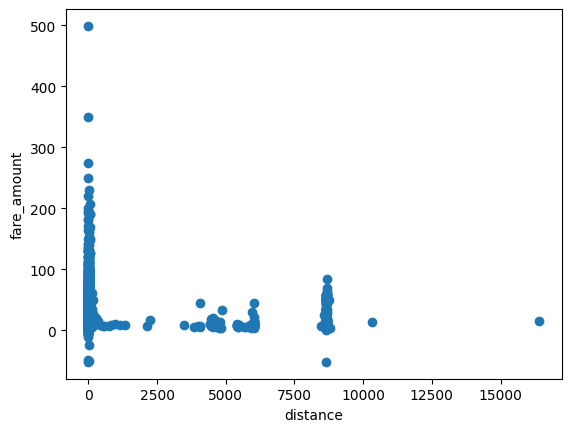

In [28]:
plt.scatter(df['distance'], df['fare_amount'])
plt.xlabel("distance")
plt.ylabel("fare_amount")
plt.show()

In [29]:
df.drop(df[df['distance'] >= 100].index, inplace = True)     # 1.
df.drop(df[df['fare_amount'] <= 0].index, inplace = True)   # 2.
df.drop(df[(df['fare_amount']>100) & (df['distance']<1)].index, inplace = True )    # 3.
df.drop(df[(df['fare_amount']<100) & (df['distance']>100)].index, inplace = True )  # 4.  

1. Removes rows from the DataFrame df where the 'distance' column is greater than or equal to 60.

2. Removes rows from the DataFrame df where the 'fare_amount' column is less than or equal to 0.

3. Removes rows from the DataFrame df where both conditions are met:
    'fare_amount' is greater than 100.
    'distance' is less than 1.

4. Removes rows from the DataFrame df where both conditions are met:
    'fare_amount' is less than 100.
    'distance' is greater than 100.

In [30]:
df.shape

(199471, 8)

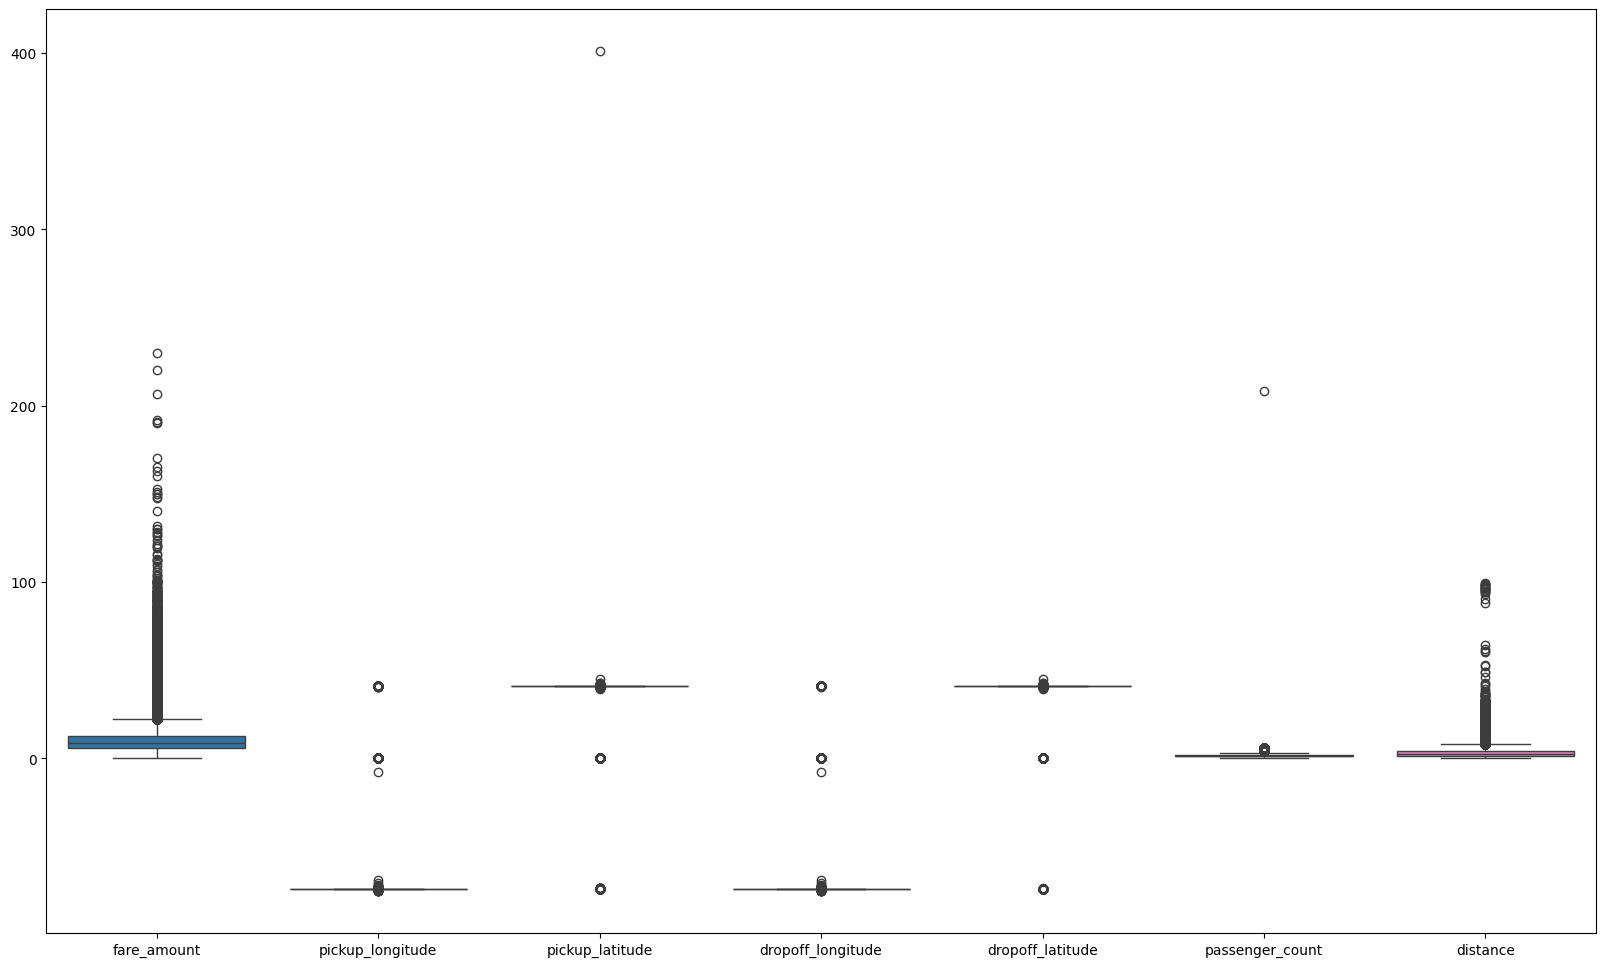

In [31]:
plt.figure(figsize=(20,12))
sns.boxplot(data = df)
plt.show()

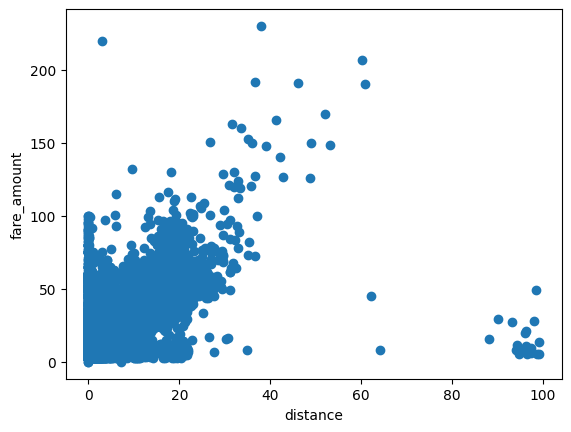

In [32]:
plt.scatter(df['distance'], df['fare_amount'])
plt.xlabel("distance")
plt.ylabel("fare_amount")
plt.show()

# Coorelation Matrix

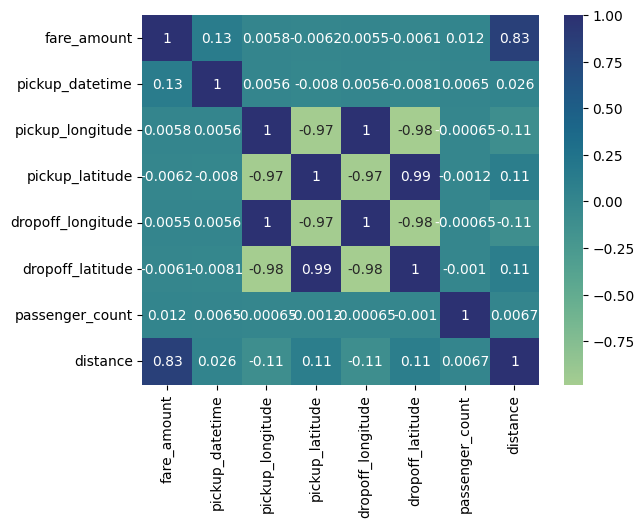

In [33]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='crest', annot=True)
plt.show()

# Dependent and Independent Variables

In [34]:
X = df['distance'].values.reshape(-1, 1)
y = df['fare_amount'].values.reshape(-1, 1)

In [35]:
std = StandardScaler()

x_std = std.fit_transform(X)
y_std = std.fit_transform(y)

StandardScaler is used for standardization or z-score normalization. It scales the data such that it has a mean of 0 and a standard deviation of 1. 

# Splitting the Dataset

In [36]:
X_train, X_test, y_train, y_test = train_test_split(x_std, y_std, test_size=0.2, random_state=0)

# Simple Linear Regression

In [37]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [38]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.7f}".format(lr.score(X_test, y_test)))

Training set score: 0.69
Test set score: 0.6988953


In [39]:
y_pred = lr.predict(X_test)
result = pd.DataFrame()
result[['Actual']] = y_test
result[['Predicted']] = y_pred
result.sample(10)

,Actual,Predicted
33334,-0.501594,-0.444231
23650,0.693397,0.329752
9361,-0.169075,0.170816
37868,0.173836,0.274259
18682,-0.709419,-0.430314
10216,-0.127510,-0.155499
32511,0.080315,-0.206037
27130,-0.137901,-0.080835
25794,1.784477,1.368999
2399,0.495964,0.559456


Creating a DataFrame (result) to compare the actual and predicted values.

In [40]:
cols = ['Model', 'MSE', 'RMSE', 'R2']

lr_result = pd.DataFrame(columns = cols)

linreg_metrics = pd.DataFrame([[
    "Linear Regresion",
    metrics.mean_squared_error(y_test, y_pred),  # MSE
    np.sqrt(metrics.mean_squared_error(y_test, y_pred)),  # RMSE
    metrics.r2_score(y_test, y_pred)  # R2
    ]], columns = cols)

lr_result = pd.concat([lr_result, linreg_metrics], ignore_index=True)
lr_result

,Model,MSE,RMSE,R2
0,Linear Regresion,0.308982,0.555861,0.698895


# RandomForestRegressor

In [41]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=10)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=10)

n_estimators=100: This parameter specifies the number of decision trees (or estimators) that will be used in the random forest.
    
random_state=10: This parameter sets the random seed for reproducibility. 
By setting a random seed, you ensure that the randomness introduced in the algorithm is consistent across different runs

In [42]:
print("Training set score: {:.2f}".format(rf_reg.score(X_train, y_train)))
print("Test set score: {:.7f}".format(rf_reg.score(X_test, y_test)))

Training set score: 0.92
Test set score: 0.6793089


In [43]:
y_pred_RF = rf_reg.predict(X_test)
result = pd.DataFrame()
result[['Actual']] = y_test
result['Predicted'] = y_pred_RF
result.sample(10)

,Actual,Predicted
27128,0.069923,-0.184870
31369,-0.335335,-0.194014
28710,-0.501594,-0.289094
18740,-0.085945,-0.012167
17280,-0.189857,0.053194
13316,-0.169075,-0.423244
34821,-0.085945,0.035632
29987,0.038750,-0.143512
13627,-0.085945,0.056103
14223,-0.397682,-0.382511


Creating a DataFrame (result) to compare the actual and predicted values.

In [44]:
cols = ['Model', 'MSE', 'RMSE', 'R2']

rf_reg_result = pd.DataFrame(columns = cols)

linreg_metrics = pd.DataFrame([[
    "Random Forest Regressor",
    metrics.mean_squared_error(y_test, y_pred_RF),  # MSE
    np.sqrt(metrics.mean_squared_error(y_test, y_pred_RF)),  # RMSE
    metrics.r2_score(y_test, y_pred_RF)  # R2
    ]], columns = cols)

rf_reg_result = pd.concat([rf_reg_result, linreg_metrics], ignore_index=True)
rf_reg_result

,Model,MSE,RMSE,R2
0,Random Forest Regressor,0.329081,0.573656,0.679309


# Comparison

In [45]:
result = pd.concat([lr_result, rf_reg_result])

In [46]:
result

,Model,MSE,RMSE,R2
0,Linear Regresion,0.308982,0.555861,0.698895
0,Random Forest Regressor,0.329081,0.573656,0.679309
